In [17]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [35]:
mnist = cPickle.load(open("/large/data/mnist.pkl", "rb"))

(train, validation, test) = mnist
(train_images, train_labels) = train
(validation_images, validation_labels) = validation
(test_images, test_labels) = test

image_size = 28
features_size = 784
classes_count = 10

print train_images.shape
print validation_images.shape
print test_images.shape

(50000, 784)
(10000, 784)
(10000, 784)


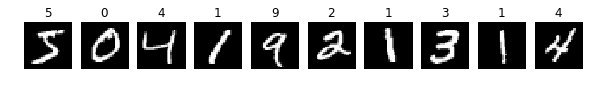

In [36]:
for i in xrange(10):
    plt.subplot(1, 10, i + 1)
    plt.title(str(train_labels[i]))
    plt.imshow(train_images[i].reshape((image_size, image_size)))
    plt.axis('off')

epoch 0: accuracy = 0.110000, loss = 2.319025
epoch 10: accuracy = 0.215000, loss = 2.225779
epoch 20: accuracy = 0.365000, loss = 2.104207
epoch 30: accuracy = 0.545000, loss = 1.963161
epoch 40: accuracy = 0.625000, loss = 1.635652
epoch 50: accuracy = 0.635000, loss = 1.439956
epoch 60: accuracy = 0.700000, loss = 1.327542
epoch 70: accuracy = 0.765000, loss = 1.259023
epoch 80: accuracy = 0.750000, loss = 1.256487
epoch 90: accuracy = 0.845000, loss = 1.198428
epoch 100: accuracy = 0.845000, loss = 1.152348
epoch 110: accuracy = 0.845000, loss = 1.170261
epoch 120: accuracy = 0.845000, loss = 1.111250
epoch 130: accuracy = 0.795000, loss = 1.217699
epoch 140: accuracy = 0.840000, loss = 1.131216
epoch 150: accuracy = 0.835000, loss = 1.144150
epoch 160: accuracy = 0.870000, loss = 1.129808
epoch 170: accuracy = 0.860000, loss = 1.067860
epoch 180: accuracy = 0.890000, loss = 1.125740
epoch 190: accuracy = 0.885000, loss = 1.063755
epoch 200: accuracy = 0.850000, loss = 1.096474
epo

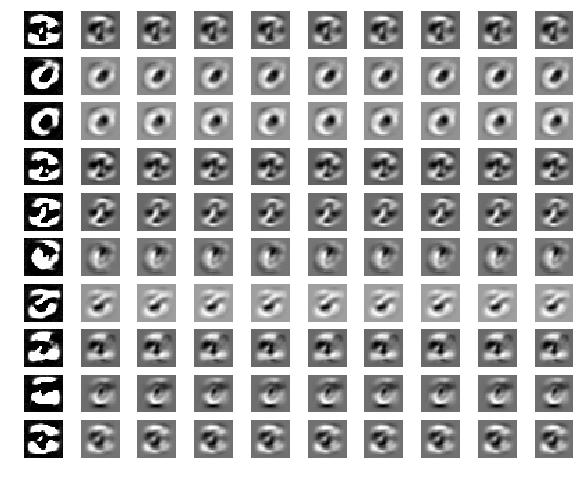

In [274]:
hidden_neurons = 400
minibatch_size = 200
regularization_factor = 0.05
learning_rate = 0.5
learning_rate_decay = 0.99

# 1 relu layers, 1 output softmax layer
# initially it was 4 layers but I couldn't make it work in this toy setting
W3 = np.random.uniform(high = 1.0 / hidden_neurons, size = (features_size, hidden_neurons))
b3 = np.zeros(shape = (hidden_neurons,))
W4 = np.random.uniform(high = 1.0 / hidden_neurons, size = (hidden_neurons, classes_count))
b4 = np.zeros(shape = (classes_count,))

learning_history = []

for epoch in range(1000):
    choice = np.random.choice(train_images.shape[0], minibatch_size)
    X = train_images[choice]
    y = train_labels[choice]
    
    # forward pass
    H2 = X
    H3 = np.maximum(np.dot(H2, W3) + b3, 0)
    H4 = np.dot(H3, W4) + b4

    scores = H4 - np.max(H4, axis = 1, keepdims = True)
    probs = np.exp(scores)
    probs /= np.sum(probs, axis = 1, keepdims = True)
    labels = np.argmax(probs, axis = 1)

    accuracy = np.mean(labels == y)    

    loss = np.sum(-np.log(probs[range(minibatch_size), y])) / minibatch_size
    loss += 0.5 * regularization_factor * (np.sum(W3 * W3) + np.sum(b3 * b3))
    loss += 0.5 * regularization_factor * (np.sum(W4 * W4) + np.sum(b4 * b4))
    
    learning_history.append((accuracy, loss))

    if epoch % 10 == 0:
        print 'epoch %d: accuracy = %f, loss = %f' % (epoch, accuracy, loss)
        
    if epoch % 100 == 0:
        for i in range(10):
            plt.subplot(10, 10, epoch / 100 + i * 10 + 1)
            plt.imshow(W3[:, i * 20].reshape(image_size, image_size))
            plt.axis('off')
            
    # backprop
    # layer 4
    dL_dH4 = np.array(probs)
    dL_dH4[range(minibatch_size), y] -= 1
    dL_dH4 /= minibatch_size

    dH4_dW4 = np.array(H3)

    dL_dW4 = np.dot(dH4_dW4.T, dL_dH4)
    dL_dW4 += regularization_factor * W4
    dL_db4 = np.sum(dL_dH4, axis = 0)
    dL_db4 += regularization_factor * b4
    
    # layer 3
    dH3_dW3 = np.array(H2)
    dH3_db3 = np.ones(shape = H2.shape[0])  
    
    dH4_dH3 = np.array(W4)
    
    dL_dH3 = np.dot(dL_dH4, dH4_dH3.T)
    dL_dH3[H3 <= 0] = 0
    
    dL_dW3 = np.dot(dH3_dW3.T, dL_dH3)
    dL_dW3 += regularization_factor * W3
    dL_db3 = np.dot(dH3_db3.T, dL_dH3)
    dL_db3 += regularization_factor * b3
    
    W4 += - learning_rate * dL_dW4
    b4 += - learning_rate * dL_db4
    W3 += - learning_rate * dL_dW3
    b3 += - learning_rate * dL_db3
    
    learning_rate *= learning_rate_decay


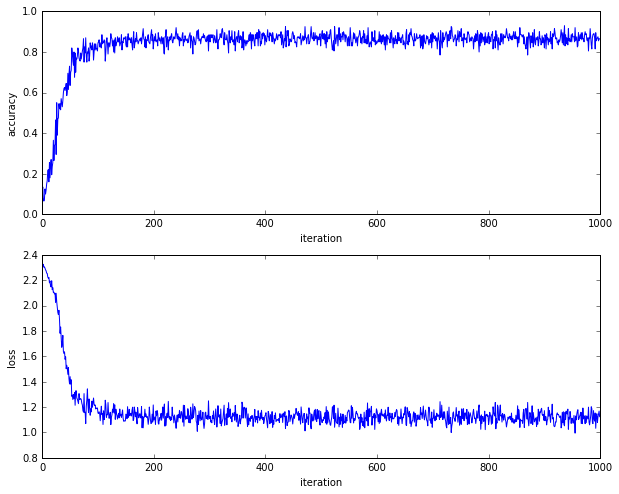

In [275]:
plt.subplot(2, 1, 1)
plt.plot([x[0] for x in learning_history])
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.subplot(2, 1, 2)
plt.plot([x[1] for x in learning_history])
plt.xlabel('iteration')
plt.ylabel('loss')

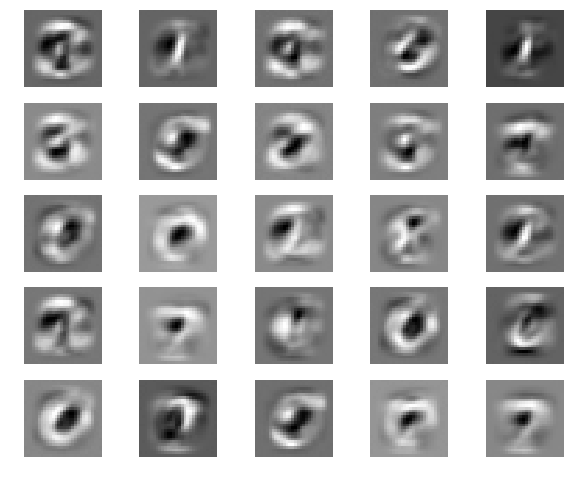

In [276]:
for i in xrange(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(W3[:, i].reshape(image_size, image_size))
    plt.axis('off')

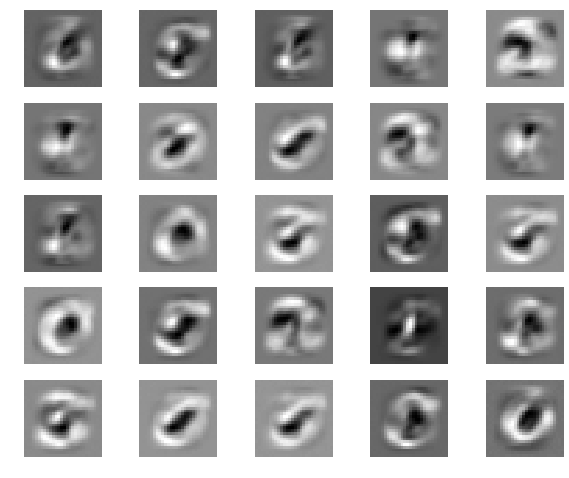

In [277]:
for i in xrange(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(W3[:, i + 25].reshape(image_size, image_size))
    plt.axis('off')